In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("./data/data_total_split_datetime")
df = df.drop(columns=["Unnamed: 0.1"])
df = df.drop(columns=["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856566 entries, 0 to 856565
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   msno                          856566 non-null  int64  
 1   city                          856566 non-null  int64  
 2   bd                            856566 non-null  int64  
 3   registered_via                856566 non-null  int64  
 4   is_churn                      856566 non-null  int64  
 5   is_back                       856566 non-null  int64  
 6   payment_plan_sum              856566 non-null  int64  
 7   plan_list_price               856566 non-null  int64  
 8   actual_amount_paid            856566 non-null  int64  
 9   discount_rate                 856566 non-null  float64
 10  is_auto_renew                 856566 non-null  float64
 11  is_cancel                     856566 non-null  float64
 12  transaction_count             856566 non-nul

### feature importance : (성별 nan값 포함)

In [43]:
# X와 y 정의 (예시)
X = df.drop(columns='is_churn')  # 'target'은 예시로 넣은 이름입니다
y = df['is_churn']

# 컬럼 이름을 문자열로 변환
X.columns = X.columns.astype(str)

# 모델 학습
model = RandomForestClassifier()
model.fit(X, y)

# 특성 중요도 추출
importances = model.feature_importances_

# 결과 출력
print(importances)

[0.01907557 0.01185783 0.01311909 0.01420289 0.00326696 0.027775
 0.025968   0.0277454  0.00520576 0.08188648 0.04103537 0.03381632
 0.01894033 0.01908506 0.0192711  0.01935905 0.01927936 0.02075409
 0.01946659 0.00929808 0.01100288 0.01565527 0.00866866 0.36253669
 0.03699433 0.00376826 0.04195184 0.04523835 0.00268513 0.00841779
 0.01267248 0.        ]


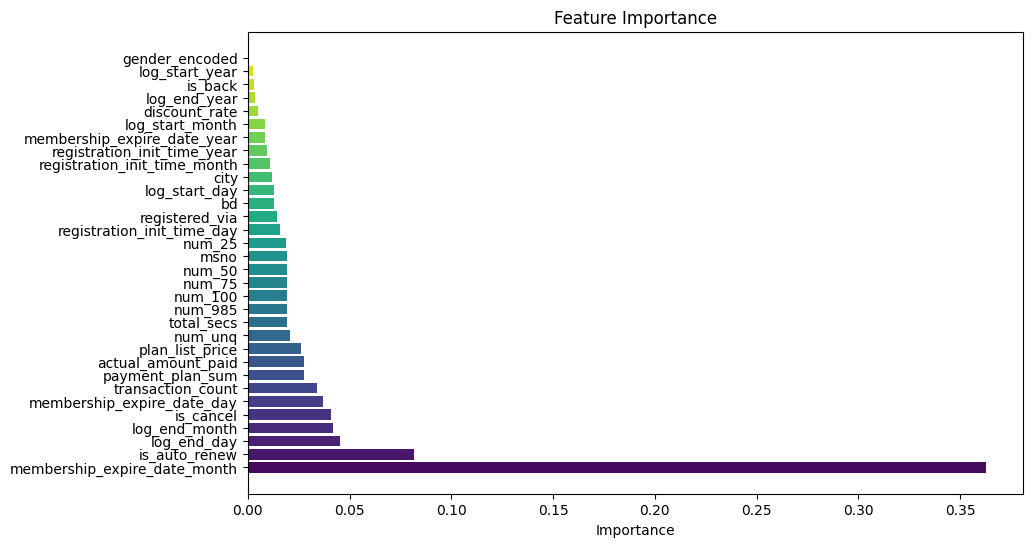

In [44]:

# 특성 중요도에 대한 막대 그래프 시각화
def plot_feature_importances(importances, feature_names):
    # 중요도 순으로 정렬
    indices = np.argsort(importances)[::-1]
    
    # 팔레트 색상 적용 (예시로 'viridis' 팔레트 사용)
    colors = sns.color_palette("viridis", len(importances))

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(len(importances)), importances[indices], align="center", color=colors)
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Importance")
    plt.show()

# 특성 중요도 시각화 함수 실행
plot_feature_importances(importances, X.columns)

### feature importance : (성별 nan값 제외)

In [50]:
df["gender_encoded"].unique()

array([ 1., -1.,  0.])

In [51]:
df_filtered = df[df['gender_encoded'] != -1]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368210 entries, 0 to 856564
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   msno                          368210 non-null  int64  
 1   city                          368210 non-null  int64  
 2   bd                            368210 non-null  int64  
 3   registered_via                368210 non-null  int64  
 4   is_churn                      368210 non-null  int64  
 5   is_back                       368210 non-null  int64  
 6   payment_plan_sum              368210 non-null  int64  
 7   plan_list_price               368210 non-null  int64  
 8   actual_amount_paid            368210 non-null  int64  
 9   discount_rate                 368210 non-null  float64
 10  is_auto_renew                 368210 non-null  float64
 11  is_cancel                     368210 non-null  float64
 12  transaction_count             368210 non-null  in

In [52]:
# X와 y 정의
X = df_filtered.drop(columns='is_churn')  # 'is_churn'은 예시로 넣은 이름입니다
y = df_filtered['is_churn']

# 컬럼 이름을 문자열로 변환
X.columns = X.columns.astype(str)

# 모델 학습
model = RandomForestClassifier()
model.fit(X, y)

# 특성 중요도 추출
importances = model.feature_importances_

# 결과 출력
print(importances)

[0.0210629  0.01209013 0.0175347  0.00568858 0.00360218 0.03427445
 0.02703632 0.02893234 0.00372657 0.09804783 0.03215668 0.0532774
 0.02074206 0.02005111 0.02004917 0.01999341 0.02049898 0.02160904
 0.02059911 0.01069024 0.01185445 0.01612306 0.00779874 0.29444507
 0.03722848 0.00211089 0.04615635 0.06445766 0.00282456 0.00870085
 0.01337113 0.00326559]


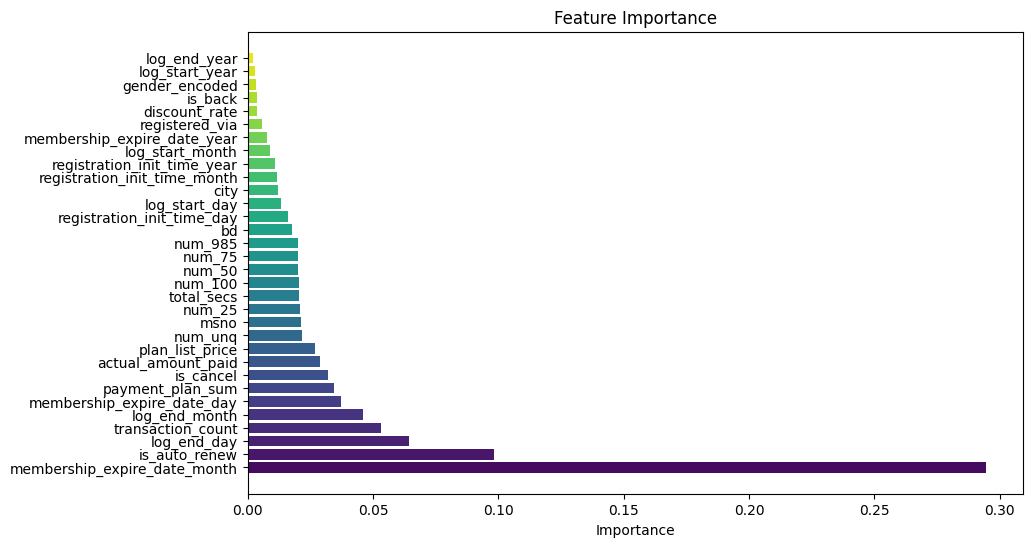

In [53]:

# 특성 중요도에 대한 막대 그래프 시각화
def plot_feature_importances(importances, feature_names):
    # 중요도 순으로 정렬
    indices = np.argsort(importances)[::-1]
    
    # 팔레트 색상 적용 (예시로 'viridis' 팔레트 사용)
    colors = sns.color_palette("viridis", len(importances))

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(len(importances)), importances[indices], align="center", color=colors)
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Importance")
    plt.show()

# 특성 중요도 시각화 함수 실행
plot_feature_importances(importances, X.columns)